## Compare the ELFIN and THEMIS-A spectra during the 4 September 2022 substorm event.
Let's make a summary plot first.

In [1]:
import dateutil.parser
import pathlib
from datetime import datetime
import logging

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.colors
import pyspedas
import pytplot
import manylabels
import pandas as pd
import numpy as np

import pad

logger = logging.getLogger()
logger.disabled = True

c:\Users\shumkms1\AppData\Local\anaconda3\envs\asilib_dev_20241108\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
ELECTRON_CHARGE = 1.60217663E-19  # Coulombs
ELECTRON_MASS = 9.1093837E-31  # kg
PERMITTIVITY = 8.8541878188E-12	 # C^2⋅kg^−1⋅m^−3⋅s^2
SPEED_OF_LIGHT = 3E8 # ms/s
R_E = 6378.137  # km

## Load and analyze THEMIS probe spectra

In [3]:
time_range = ('2022-09-04T04:14', '2022-09-04T04:23')
_time_range = [dateutil.parser.parse(t_i) for t_i in time_range]
coordinates = 'gsm'
themis_probe = 'a'

themis_spectra_time_ranges = (
    [datetime(2022, 9, 4, 4, 14, 30), datetime(2022, 9, 4, 4, 16, 0)],
    # [datetime(2022, 9, 4, 4, 17, 0), datetime(2022, 9, 4, 4, 18, 0)],
    # [datetime(2022, 9, 4, 4, 18, 30), datetime(2022, 9, 4, 4, 19, 30)],
    [datetime(2022, 9, 4, 4, 20, 0), datetime(2022, 9, 4, 4, 21, 0)],
)
themis_colors = plt.cm.viridis(np.linspace(0, 1, len(themis_spectra_time_ranges)))

In [4]:
themis_probes = np.array(['a', 'd', 'e'])
themis_Ew = ('fff_32_edc34', 'fff_32_edc34', 'fff_32_edc12')[np.where(themis_probes==themis_probe)[0][0]]
themis_Bw = ('fff_32_scm3', 'fff_32_scm3', 'fff_32_scm3')[np.where(themis_probes==themis_probe)[0][0]]

In [8]:
fgm_vars = pyspedas.themis.fgm(probe=themis_probe, trange=time_range, time_clip=True)
sst_vars = pyspedas.themis.sst(probe=themis_probe, trange=time_range, time_clip=True)
mom_vars = pyspedas.themis.mom(probe=themis_probe, trange=time_range, time_clip=True)
fft_vars = pyspedas.themis.fft(probe=themis_probe, trange=time_range, time_clip=True)
state_vars = pyspedas.themis.state(probe=themis_probe, trange=time_range, time_clip=True)

fgm_xr = pytplot.get_data(f'th{themis_probe}_fgl_{coordinates}')
fgm_times = np.array([t_i.replace(tzinfo=None) for t_i in pyspedas.time_datetime(fgm_xr.times)])
vi_xr = pytplot.get_data(f'th{themis_probe}_peim_velocity_{coordinates}')
sst_xr = pytplot.get_data(f'th{themis_probe}_psef_en_eflux')
valid_sst_channels = np.where(~np.isnan(sst_xr.v[0, :]))[0]
sst_times = np.array([t_i.replace(tzinfo=None) for t_i in pyspedas.time_datetime(sst_xr.times)])
sst_spectrum = 1E6*sst_xr.y[:, valid_sst_channels]/sst_xr.v[0, valid_sst_channels]
bw_xr = pytplot.get_data(f'th{themis_probe}_{themis_Bw}')
ew_xr = pytplot.get_data(f'th{themis_probe}_{themis_Ew}')


05-Feb-25 12:38:39: c:\Users\shumkms1\AppData\Local\anaconda3\envs\asilib_dev_20241108\Lib\contextlib.py:105: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shumkms1\\AppData\\Local\\Temp\\tmptvkksvsz'>
  self.gen = func(*args, **kwds)

05-Feb-25 12:38:39: c:\Users\shumkms1\AppData\Local\anaconda3\envs\asilib_dev_20241108\Lib\contextlib.py:105: ResourceWarning: unclosed <socket.socket fd=4368, family=2, type=1, proto=0, laddr=('10.144.24.145', 57888), raddr=('128.32.18.32', 80)>
  self.gen = func(*args, **kwds)

05-Feb-25 12:38:39: c:\Users\shumkms1\AppData\Local\anaconda3\envs\asilib_dev_20241108\Lib\contextlib.py:105: ResourceWarning: unclosed file <_io.BufferedRandom name='C:\\Users\\shumkms1\\AppData\\Local\\Temp\\tmpoo48c7lb'>
  self.gen = func(*args, **kwds)

05-Feb-25 12:38:39: c:\Users\shumkms1\AppData\Local\anaconda3\envs\asilib_dev_20241108\Lib\contextlib.py:105: ResourceWarning: unclosed <socket.socket fd=4388, family=2, type=1, proto=0, laddr=('10.144.2

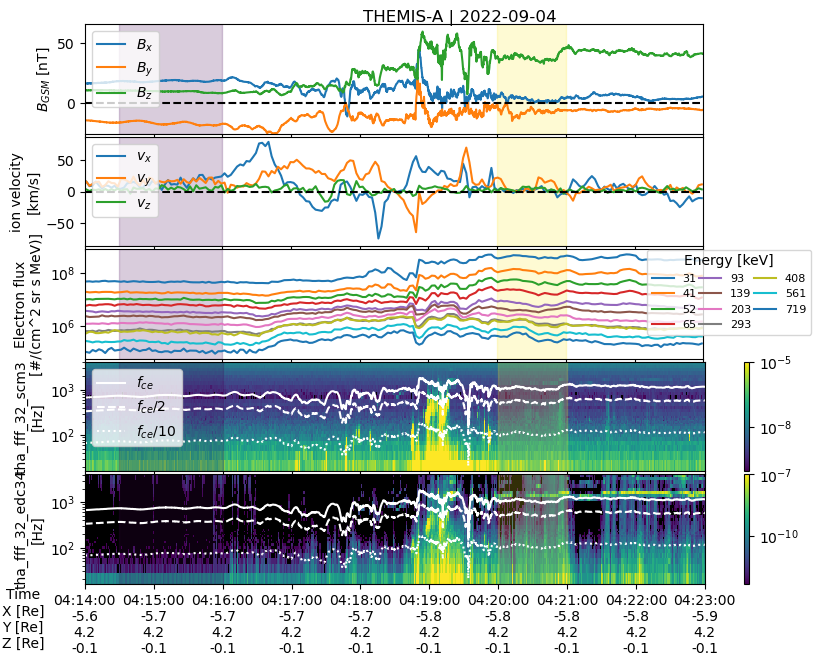

In [9]:
fig, ax = plt.subplots(5, sharex=True, figsize=(10, 7))

_lines = ax[0].plot(fgm_times, fgm_xr.y)
ax[0].legend(iter(_lines), [f'$B_{{{i}}}$' for i in ['x', 'y', 'z']], loc='upper left')
ax[0].axhline(0, c='k', ls='--')
ax[0].set(
    ylim=(-25, 1.1*np.max(fgm_xr.y)), 
    ylabel=f'$B_{{{coordinates.upper()}}}$ [nT]',
    xlim=_time_range
    )

_lines = ax[1].plot(pyspedas.time_datetime(vi_xr.times), vi_xr.y)
ax[1].legend(iter(_lines), [f'$v_{{{i}}}$' for i in [f'x', 'y', 'z']], loc='upper left')
ax[1].axhline(0, c='k', ls='--')
ax[1].set(ylim=(-1.1*np.nanmax(vi_xr.y), 1.1*np.nanmax(vi_xr.y)), ylabel='ion velocity\n[km/s]')

for valid_e_channel in valid_sst_channels:
    ax[2].plot(
        sst_times, 
        sst_spectrum[:, valid_e_channel], 
        label=int(sst_xr.v[0, valid_e_channel]/1000)
        )
ax[2].set(yscale='log', ylabel='Electron flux\n[#/(cm^2 sr s MeV)]')
ax[2].legend(fontsize=8, ncols=3, title='Energy [keV]', loc='upper left', bbox_to_anchor=(0.9, 1.05), columnspacing=0.2)

p = ax[3].pcolormesh(
    np.array(pyspedas.time_datetime(bw_xr.times)), 
    bw_xr.v, 
    bw_xr.y.T, 
    norm=matplotlib.colors.LogNorm(vmax=1E-5),
    shading='nearest'
    )
plt.colorbar(p, ax=ax[3])
ax[3].set(yscale='log', ylabel=f'th{themis_probe}_{themis_Bw}\n[Hz]')    
f_ce = np.abs(ELECTRON_CHARGE)*1E-9*np.linalg.norm(fgm_xr.y, axis=1)/(2*np.pi*ELECTRON_MASS)

p = ax[4].pcolormesh(
    pyspedas.time_datetime(ew_xr.times), 
    ew_xr.v, 
    ew_xr.y.T, 
    norm=matplotlib.colors.LogNorm(vmax=1E-7)
    )
plt.colorbar(p, ax=ax[4])
ax[4].set(yscale='log', ylabel=f'th{themis_probe}_{themis_Ew}\n[Hz]')

for ax_i in ax[3:]:
    ax_i.plot(pyspedas.time_datetime(fgm_xr.times), f_ce, label=f'$f_{{ce}}$', c='w', ls='-')
    ax_i.plot(pyspedas.time_datetime(fgm_xr.times), f_ce/2, label=f'$f_{{ce}}/2$', c='w', ls='--')
    ax_i.plot(pyspedas.time_datetime(fgm_xr.times), f_ce/10, label=f'$f_{{ce}}/10$', c='w', ls=':')
    ax_i.set_facecolor('k')
ax[3].legend(loc='upper left')

plt.suptitle(f'THEMIS-{themis_probe.upper()} | {time_range[0][:10]}')

state_xr = pytplot.get_data(f'th{themis_probe}_pos_{coordinates}')
state_times = pyspedas.time_datetime(state_xr.times)
state_times = [state_time.replace(tzinfo=None) for state_time in state_times]
state_df = pd.DataFrame(
    index=state_times,
    data={f'{component.upper()} [Re]':state_xr.y[:, i]/R_E for i, component in enumerate(['x', 'y', 'z'])}
    )
manylabels.ManyLabels(ax[-1], state_df)

for ax_i in ax[:3]:
    divider = make_axes_locatable(ax_i)
    cax = divider.append_axes("right", size="24%", pad=0.08)
    cax.remove()
plt.subplots_adjust(hspace=0.03, top=0.959)

for themis_spectra_time_range, color in zip(themis_spectra_time_ranges, themis_colors):
    for ax_i in ax:
        ax_i.axvspan(*themis_spectra_time_range, color=color, alpha=0.2)

What fraction of the total field was Bz before and after the dipolarization?

In [13]:
for i, themis_time_range in enumerate(themis_spectra_time_ranges):
    idx = np.where((np.array(fgm_times)>=themis_time_range[0]) & (np.array(fgm_times)<=themis_time_range[1]))[0]
    mean_b = fgm_xr.y[idx, :].mean(axis=0)
    mean_bxy = fgm_xr.y[idx, 1:].mean(axis=0)
    
    print(
        f'{themis_time_range=}\n|B| = {np.linalg.norm(mean_b) :.2f} nT,'
        f'|Bz|/|B| = {mean_b[-1]/np.linalg.norm(mean_b) :.2f}, '
        f'|Bz|/|Bxy| = {mean_b[-1]/np.linalg.norm(mean_bxy) :.2f}\n'
        )

themis_time_range=[datetime.datetime(2022, 9, 4, 4, 14, 30), datetime.datetime(2022, 9, 4, 4, 16)]
|B| = 26.46 nT,|Bz|/|B| = 0.37, |Bz|/|Bxy| = 0.51

themis_time_range=[datetime.datetime(2022, 9, 4, 4, 20), datetime.datetime(2022, 9, 4, 4, 21)]
|B| = 38.54 nT,|Bz|/|B| = 0.98, |Bz|/|Bxy| = 0.98



# Calc Spectra

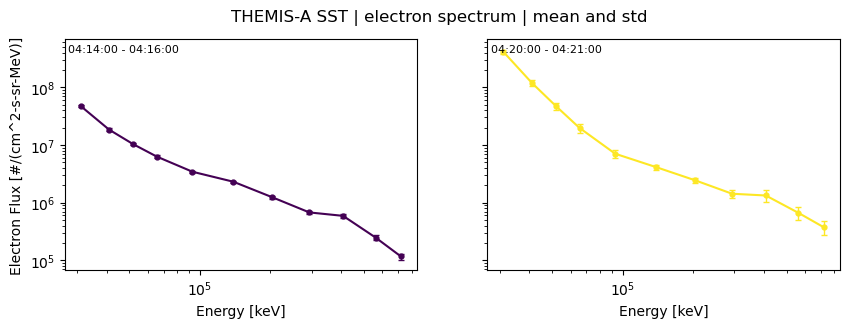

In [40]:
fig, bx = plt.subplots(1, len(themis_spectra_time_ranges), figsize=(10, 3), sharey=True, sharex=True)

themis_spectra_mean = np.nan*np.zeros((len(themis_spectra_time_ranges), valid_sst_channels.shape[0]))
themis_spectra_std = np.nan*np.zeros((len(themis_spectra_time_ranges), valid_sst_channels.shape[0]))

for i, (themis_time_range, bx_i, color) in enumerate(zip(themis_spectra_time_ranges, bx, themis_colors)):
    idx = np.where((sst_times>=themis_time_range[0]) & (sst_times<=themis_time_range[1]))[0]
    themis_spectra_mean[i, :] = sst_spectrum[idx, :].mean(axis=0)
    themis_spectra_std[i, :] = sst_spectrum[idx, :].std(axis=0)
    bx_i.errorbar(sst_xr.v[0, valid_sst_channels],  themis_spectra_mean[i, :], color=color, yerr=themis_spectra_std[i, :], capsize=2,
            markersize=7, elinewidth=1, marker='.', ls='-')
    bx_i.set(xlabel='Energy [keV]', yscale='log', xscale='log')
    bx_i.text(
        0.01, 0.98, f'{themis_time_range[0]:%H:%M:%S} - {themis_time_range[1]:%H:%M:%S}', 
        fontsize=8, transform=bx_i.transAxes, va='top'
        )
bx[0].set_ylabel('Electron Flux [#/(cm^2-s-sr-MeV)]')
plt.suptitle(f'THEMIS-{themis_probe.upper()} SST | electron spectrum | mean and std');

In [41]:
fgm_times = np.array([t_i.replace(tzinfo=None) for t_i in pyspedas.time_datetime(fgm_xr.times)])
bidx_before = np.where(
    (fgm_times>=themis_spectra_time_ranges[0][0]) & 
    (fgm_times<=themis_spectra_time_ranges[0][1])
    )[0]
bidx_after = np.where(
    (fgm_times>=themis_spectra_time_ranges[-1][0]) & 
    (fgm_times<=themis_spectra_time_ranges[-1][1])
    )[0]
mag_b = np.linalg.norm(fgm_xr.y, axis=1)
mean_b_before = mag_b[bidx_before].mean()
mean_b_after = mag_b[bidx_after].mean()
print(f'B field before: {mean_b_before} and after: {mean_b_after}.')

B field before: 26.180891036987305 and after: 38.66700744628906.


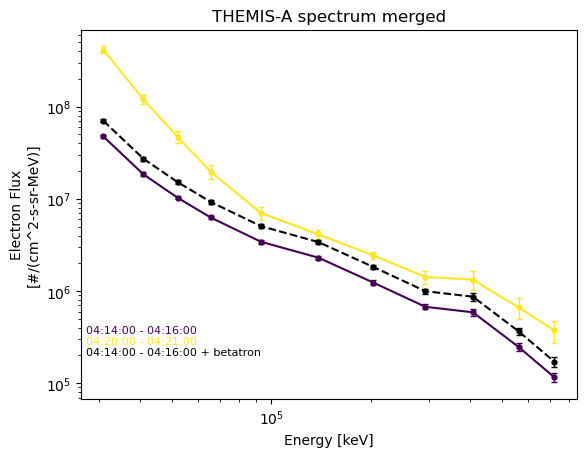

In [42]:
fig, ax = plt.subplots()
for i, (themis_time_range, color) in enumerate(zip(themis_spectra_time_ranges, themis_colors)):
    ax.errorbar(sst_xr.v[0, valid_sst_channels],  themis_spectra_mean[i, :], color=color, yerr=themis_spectra_std[i, :], capsize=2,
            markersize=7, elinewidth=1, marker='.', ls='-')
    ax.text(
        0.01, 0.2-0.03*i, f'{themis_time_range[0]:%H:%M:%S} - {themis_time_range[1]:%H:%M:%S}', 
        fontsize=8, transform=ax.transAxes, va='top', ha='left', color=color
        )
    
ax.errorbar(
    sst_xr.v[0, valid_sst_channels],  
    (mean_b_after/mean_b_before)*themis_spectra_mean[0, :], 
    color='k', 
    yerr=(mean_b_after/mean_b_before)*themis_spectra_std[0, :], 
    capsize=2,
    markersize=7, 
    elinewidth=1, 
    marker='.', 
    ls='--'
    )
ax.text(
        0.01, 0.2-0.03*(i+1), f'{themis_spectra_time_ranges[0][0]:%H:%M:%S} - {themis_spectra_time_ranges[0][1]:%H:%M:%S} + betatron', 
        fontsize=8, transform=ax.transAxes, va='top', ha='left', color='k'
        )

ax.set(xlabel='Energy [keV]', yscale='log', xscale='log', title='THEMIS-A spectrum merged')
ax.set_ylabel(f'Electron Flux\n[#/(cm^2-s-sr-MeV)]');

So it looks like betatron acceleration does not explain the increase in the fluxes. This seems like an injection!

## Load and analyze ELFIN spectra

In [43]:
elfin_spectra_time_ranges = (
    [datetime(2022, 9, 4, 4, 18, 3), datetime(2022, 9, 4, 4, 20, 5)],
    [datetime(2022, 9, 4, 4, 20, 5), datetime(2022, 9, 4, 4, 20, 25)],
    [datetime(2022, 9, 4, 4, 20, 25), datetime(2022, 9, 4, 4, 21, 20)],
)
elfin_colors = plt.cm.jet(np.linspace(0, 1, len(elfin_spectra_time_ranges)))

In [44]:
elfin_probe = 'a'
pad_obj = pad.EPD_PAD(
    elfin_probe, time_range, start_pa=0, min_counts=None, accumulate=1, spin_time_tol=(2.5, 12),
    lc_exclusion_angle=0
)
transformed_state = pad_obj.transform_state()

17-Jan-25 16:44:44: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:391: RuntimeWarning: divide by zero encountered in divide
  self.precipitation_ratio = self.blc/self.dlc

17-Jan-25 16:44:44: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:391: RuntimeWarning: invalid value encountered in divide
  self.precipitation_ratio = self.blc/self.dlc

17-Jan-25 16:44:44: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:400: RuntimeWarning: invalid value encountered in divide
  (self.blc_std/self.blc)**2 +

17-Jan-25 16:44:44: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:401: RuntimeWarning: invalid value encountered in divide
  (self.dlc_std/self.dlc)**2



17-Jan-25 16:44:45: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:677: RuntimeWarning: divide by zero encountered in divide
  if np.prod((self.blc/self.dlc).shape) != 0:

17-Jan-25 16:44:45: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:677: RuntimeWarning: invalid value encountered in divide
  if np.prod((self.blc/self.dlc).shape) != 0:

17-Jan-25 16:44:45: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:681: RuntimeWarning: divide by zero encountered in divide
  (self.blc/self.dlc).T,

17-Jan-25 16:44:45: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:681: RuntimeWarning: invalid value encountered in divide
  (self.blc/self.dlc).T,

17-Jan-25 16:44:45: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:689: RuntimeWarning: divide by zero encountered in divide
  if colorbar and np.prod((self.blc/self.dlc).shape) != 0:

17-Jan-25 16:44:45: C:\Users\shumkms1\Documents\research\pad\src\pad\analysi

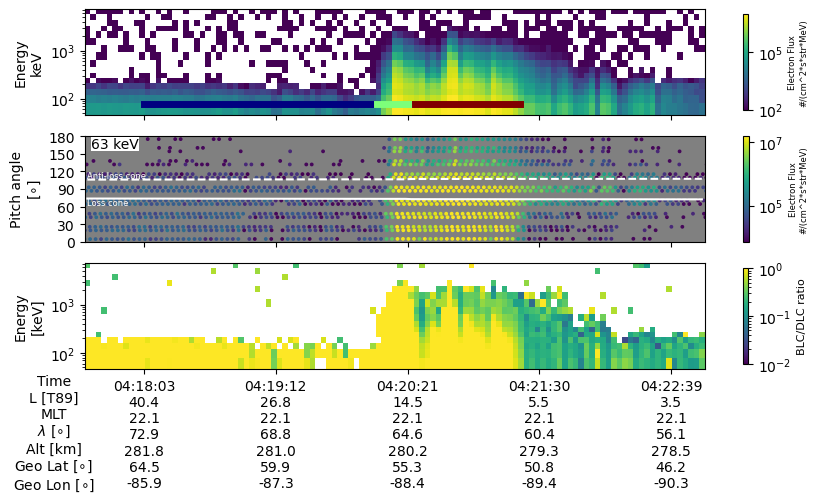

In [45]:

fig, cx = plt.subplots(3, 1, sharex=True, figsize=(10, 6))

# transformed_state = transformed_state.loc[time_range[0]:time_range[1]]
pad_obj.plot_omni(cx[0], labels=True, colorbar=True, vmin=1E2, vmax=1E7, pretty_plot=False)
pad_obj.plot_pad_scatter(cx[1])
pad_obj.plot_blc_dlc_ratio(cx[2], labels=True, colorbar=True, cmap='viridis', vmin=1E-2, vmax=1)
pad_obj.plot_position(cx[2])
cx[2].xaxis.set_major_locator(plt.MaxNLocator(5))
cx[2].xaxis.set_label_coords(-0.05, -0.007*7)
cx[2].xaxis.label.set_size(10)
for elfin_spectra_time_range, color in zip(elfin_spectra_time_ranges, elfin_colors):
    mixed_transform = transforms.blended_transform_factory(cx[0].transData, cx[0].transAxes)
    cx[0].plot(
        [elfin_spectra_time_range[0], elfin_spectra_time_range[1]], [0.1,0.1], color=color, alpha=1, transform=mixed_transform, linewidth=5
        )

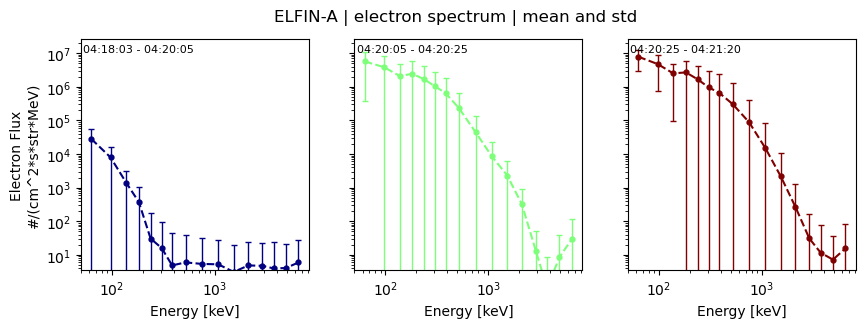

In [46]:
fig, dx = plt.subplots(1, len(elfin_spectra_time_ranges), figsize=(10, 3), sharey=True, sharex=True)

elfin_spectra_mean = np.nan*np.zeros((len(elfin_spectra_time_ranges), pad_obj.energy.shape[0]))
elfin_spectra_std = np.nan*np.zeros((len(elfin_spectra_time_ranges), pad_obj.energy.shape[0]))

for i, (elfin_spectra_time_range, dx_i, color) in enumerate(zip(elfin_spectra_time_ranges, dx, elfin_colors)):
    pad_flt = pad_obj.pad.sel(time=slice(elfin_spectra_time_range[0], elfin_spectra_time_range[1]))
    elfin_spectra_mean[i, :] = pad_flt.mean(dim=('time', 'pa'), skipna=True).sel(energy=pad_obj._flux_keys)
    elfin_spectra_std[i, :] = pad_flt.std(dim=('time', 'pa'), skipna=True).sel(energy=pad_obj._flux_keys)
    dx_i.errorbar(pad_obj.energy, elfin_spectra_mean[i, :], color=color, yerr=elfin_spectra_std[i, :], capsize=2,
            markersize=7, elinewidth=1, marker='.', ls='--')
    dx_i.set(xlabel='Energy [keV]', yscale='log', xscale='log')
    dx_i.text(
        0.01, 0.98, f'{elfin_spectra_time_range[0]:%H:%M:%S} - {elfin_spectra_time_range[1]:%H:%M:%S}', 
        fontsize=8, transform=dx_i.transAxes, va='top'
        )
dx[0].set_ylabel(f'Electron Flux\n{pad_obj._flux_units}')
plt.suptitle(f'ELFIN-{themis_probe.upper()} | electron spectrum | mean and std');

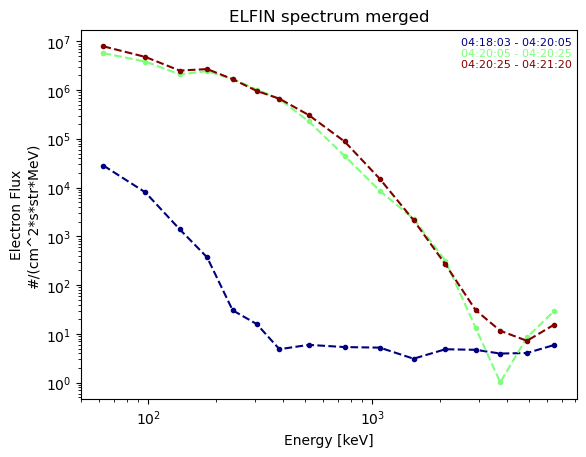

In [47]:
fig, ax = plt.subplots()
for i, (elfin_spectra_time_range, color) in enumerate(zip(elfin_spectra_time_ranges, elfin_colors)):
    ax.plot(pad_obj.energy, elfin_spectra_mean[i, :], color=color, marker='.', ls='--')
    ax.text(
        0.99, 0.98-0.03*i, f'{elfin_spectra_time_range[0]:%H:%M:%S} - {elfin_spectra_time_range[1]:%H:%M:%S}', 
        fontsize=8, transform=ax.transAxes, va='top', ha='right', color=color
        )

ax.set(xlabel='Energy [keV]', yscale='log', xscale='log', title='ELFIN spectrum merged')
ax.set_ylabel(f'Electron Flux\n{pad_obj._flux_units}');
    

Both the IB and chorus-driven spectrum are essentially the same.

## Compare the ELFIN and THEMIS spectra in a grid-form

In [49]:
themis_colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

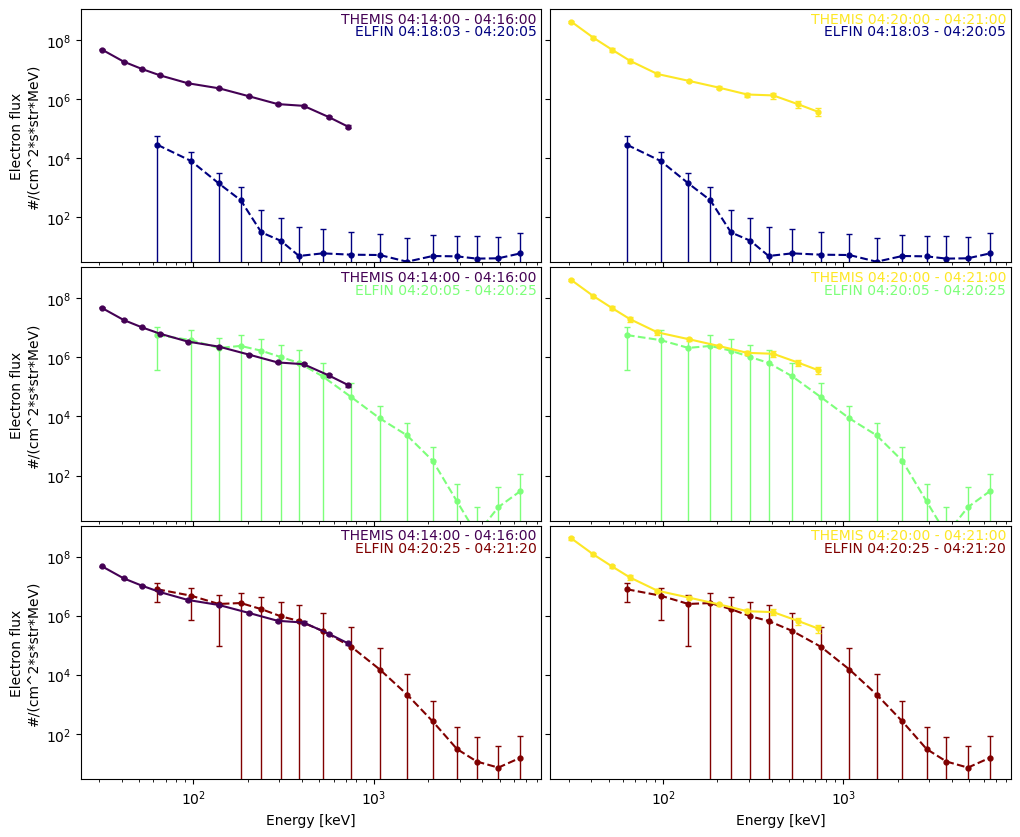

In [50]:
fig, ex = plt.subplots(len(elfin_spectra_time_ranges), len(themis_spectra_time_ranges), sharex=True, sharey=True, figsize=(12, 10))

for i, (ex_row, elfin_color) in enumerate(zip(ex, elfin_colors)):
    for j, (ex_col, themis_color) in enumerate(zip(ex_row, themis_colors)):
        ex_col.errorbar(pad_obj.energy, elfin_spectra_mean[i, :], color=elfin_color, yerr=elfin_spectra_std[i, :], capsize=2,
            markersize=7, elinewidth=1, marker='.', ls='--')
        ex_col.errorbar(sst_xr.v[0, valid_sst_channels]/1E3,  themis_spectra_mean[j, :], color=themis_color, yerr=themis_spectra_std[j, :], capsize=2,
            markersize=7, elinewidth=1, marker='.', ls='-')
        ex_col.set(yscale='log', xscale='log')
        ex_col.text(
            0.99, 0.99, 
            f'THEMIS {themis_spectra_time_ranges[j][0]:%H:%M:%S} - {themis_spectra_time_ranges[j][1]:%H:%M:%S}', 
            va='top', ha='right', transform=ex_col.transAxes, color=themis_color)
        ex_col.text(
            0.99, 0.94, 
            f'ELFIN {elfin_spectra_time_ranges[i][0]:%H:%M:%S} - {elfin_spectra_time_ranges[i][1]:%H:%M:%S}', 
            va='top', ha='right', transform=ex_col.transAxes, color=elfin_color)
for ex_i in ex[-1, :]:
    ex_i.set_xlabel('Energy [keV]')
for ex_i in ex[:, 0]:
    ex_i.set_ylabel(f'Electron flux\n{pad_obj._flux_units}')
plt.subplots_adjust(wspace=0.02, hspace=0.02)

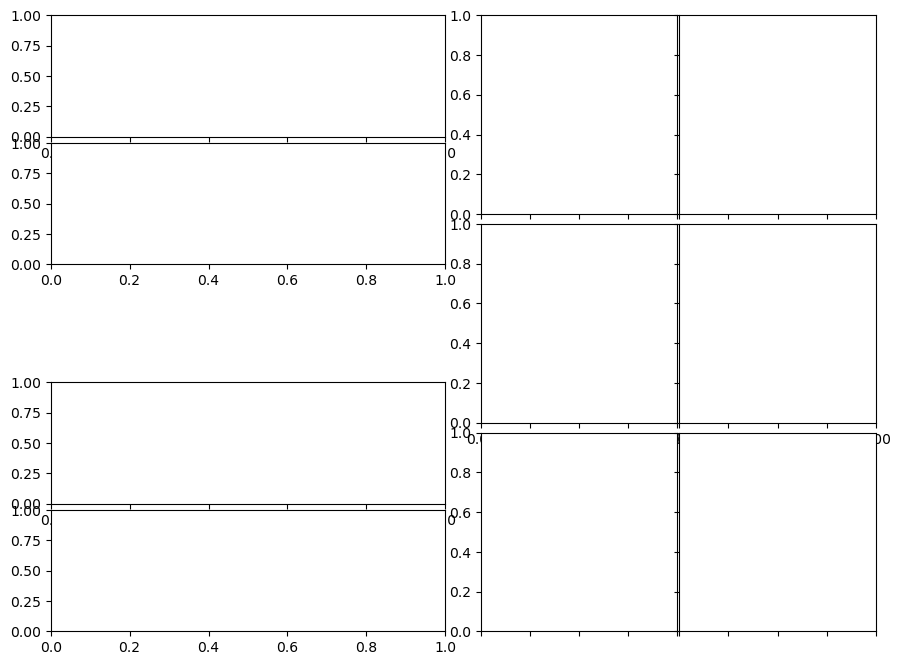

In [139]:
spec_fig = plt.figure(figsize=(15, 8))

# len(elfin_spectra_time_ranges), len(themis_spectra_time_ranges)

gs = spec_fig.add_gridspec(4, len(themis_spectra_time_ranges)+2, hspace=1.8, right=0.95, left=0.4)
themis_gs = gs[:2, :2].subgridspec(2, 1, wspace=0.05, hspace=0.05)
elfin_gs = gs[2:4, :2].subgridspec(2,1 , wspace=0.01, hspace=0.05)
spec_grid = gs[:, 2:].subgridspec(len(elfin_spectra_time_ranges), len(themis_spectra_time_ranges), wspace=0.01, hspace=0.05)

ax = [None]*4
ax[0] = spec_fig.add_subplot(themis_gs[0,:])
ax[1] = spec_fig.add_subplot(themis_gs[1,:], sharex=ax[0])
ax[2] = spec_fig.add_subplot(elfin_gs[0,:])
ax[3] = spec_fig.add_subplot(elfin_gs[1,:], sharex=ax[2])

bx = np.full((len(elfin_spectra_time_ranges), len(themis_spectra_time_ranges)), np.nan, dtype=object)
for row in range(len(elfin_spectra_time_ranges)):
    for col in range(len(themis_spectra_time_ranges)):
        if (row == 0) and (col == 0):
            bx[row, col] = spec_fig.add_subplot(spec_grid[row, col])
        else:
            bx[row, col] = spec_fig.add_subplot(spec_grid[row, col], sharex=bx[0, 0], sharey=bx[0, 0])

        if row != len(themis_spectra_time_ranges)-1:
            bx[row, col].tick_params('x', labelbottom=False)
        if col > 0:
            bx[row, col].tick_params('y', labelleft=False)

17-Jan-25 17:38:32: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:677: RuntimeWarning: divide by zero encountered in divide
  if np.prod((self.blc/self.dlc).shape) != 0:

17-Jan-25 17:38:32: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:677: RuntimeWarning: invalid value encountered in divide
  if np.prod((self.blc/self.dlc).shape) != 0:

17-Jan-25 17:38:32: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:681: RuntimeWarning: divide by zero encountered in divide
  (self.blc/self.dlc).T,

17-Jan-25 17:38:32: C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:681: RuntimeWarning: invalid value encountered in divide
  (self.blc/self.dlc).T,



(1.0, 1000000000.0)

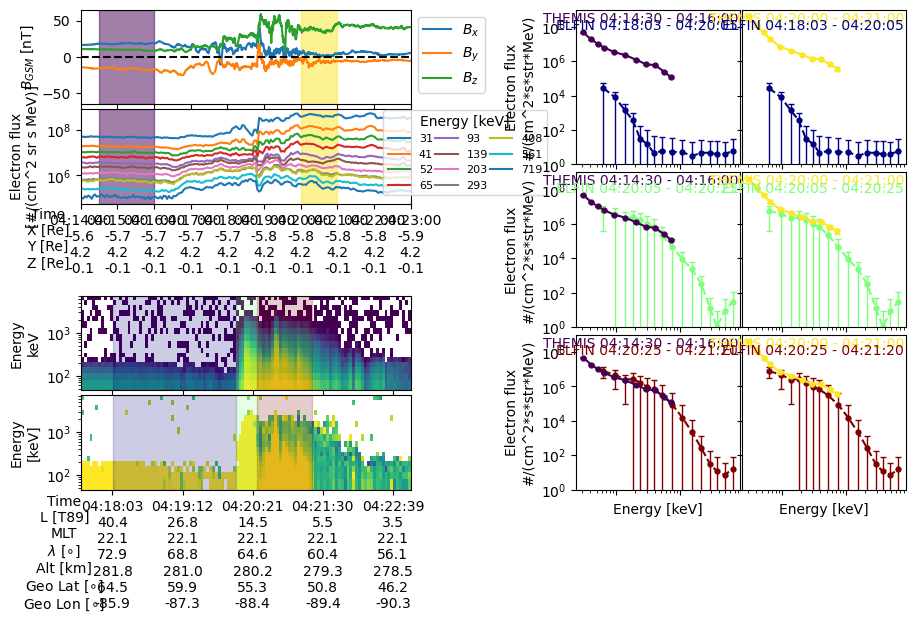

In [144]:
spec_fig = plt.figure(figsize=(15, 8))
gs = spec_fig.add_gridspec(4, len(themis_spectra_time_ranges)+2, hspace=1.8, right=0.95, left=0.4, wspace=2)
themis_gs = gs[:2, :2].subgridspec(2, 1, wspace=0.05, hspace=0.05)
elfin_gs = gs[2:4, :2].subgridspec(2,1 , wspace=0.01, hspace=0.05)
spec_grid = gs[:, 2:].subgridspec(len(elfin_spectra_time_ranges), len(themis_spectra_time_ranges), wspace=0.01, hspace=0.05)

ax = [None]*4
ax[0] = spec_fig.add_subplot(themis_gs[0,:])
ax[1] = spec_fig.add_subplot(themis_gs[1,:], sharex=ax[0])
ax[2] = spec_fig.add_subplot(elfin_gs[0,:])
ax[3] = spec_fig.add_subplot(elfin_gs[1,:], sharex=ax[2])

bx = np.full((len(elfin_spectra_time_ranges), len(themis_spectra_time_ranges)), np.nan, dtype=object)
for row in range(len(elfin_spectra_time_ranges)):
    for col in range(len(themis_spectra_time_ranges)):
        if (row == 0) and (col == 0):
            bx[row, col] = spec_fig.add_subplot(spec_grid[row, col])
        else:
            bx[row, col] = spec_fig.add_subplot(spec_grid[row, col], sharex=bx[0, 0], sharey=bx[0, 0])

        if row != len(themis_spectra_time_ranges)-1:
            bx[row, col].tick_params('x', labelbottom=False)
        if col > 0:
            bx[row, col].tick_params('y', labelleft=False)

# PLOT THEMIS
_lines = ax[0].plot(pyspedas.time_datetime(fgm_xr.times), fgm_xr.y)
ax[0].legend(iter(_lines), [f'$B_{{{i}}}$' for i in ['x', 'y', 'z']], loc='upper left', bbox_to_anchor=(1., 1))
ax[0].axhline(0, c='k', ls='--')
ax[0].set(
    ylim=(-1.1*np.max(fgm_xr.y), 1.1*np.max(fgm_xr.y)), 
    ylabel=f'$B_{{{coordinates.upper()}}}$ [nT]',
    xlim=_time_range
    )
ax[0].tick_params('x', labelbottom=False)

for valid_e_channel in valid_sst_channels:
    ax[1].plot(
        sst_times, 
        sst_spectrum[:, valid_e_channel], 
        label=int(sst_xr.v[0, valid_e_channel]/1000)
        )
ax[1].set(yscale='log', ylabel='Electron flux\n[#/(cm^2 sr s MeV)]')
ax[1].legend(fontsize=8, ncols=3, title='Energy [keV]', loc='upper left', bbox_to_anchor=(0.9, 1.05), columnspacing=0.2)
manylabels.ManyLabels(ax[1], state_df)

for themis_spectra_time_range, color in zip(themis_spectra_time_ranges, themis_colors):
    for ax_i in ax[:2]:
        ax_i.axvspan(*themis_spectra_time_range, color=color, alpha=0.5)

# PLOT ELFIN
pad_obj.plot_omni(ax[2], labels=True, vmin=1E2, vmax=1E7, pretty_plot=False, colorbar=False)
pad_obj.plot_blc_dlc_ratio(ax[3], labels=True, cmap='viridis', vmin=1E-2, vmax=1, colorbar=False)
pad_obj.plot_position(ax[3])
ax[2].tick_params('x', labelbottom=False)
ax[3].xaxis.set_major_locator(plt.MaxNLocator(5))
ax[3].xaxis.set_label_coords(-0.05, -0.007*7)
ax[3].xaxis.label.set_size(10)
    
for elfin_spectra_time_range, color in zip(elfin_spectra_time_ranges, elfin_colors):
    for ax_i in ax[2:4]:
        ax_i.axvspan(*elfin_spectra_time_range, color=color, alpha=0.2)

# Plot the spectra matrix
for i, (bx_row, elfin_color) in enumerate(zip(bx, elfin_colors)):
    for j, (bx_col, themis_color) in enumerate(zip(bx_row, themis_colors)):
        bx_col.errorbar(pad_obj.energy, elfin_spectra_mean[i, :], color=elfin_color, yerr=elfin_spectra_std[i, :], capsize=2,
            markersize=7, elinewidth=1, marker='.', ls='--')
        bx_col.errorbar(sst_xr.v[0, valid_sst_channels]/1E3,  themis_spectra_mean[j, :], color=themis_color, yerr=themis_spectra_std[j, :], capsize=2,
            markersize=7, elinewidth=1, marker='.', ls='-')
        bx_col.set(yscale='log', xscale='log')
        bx_col.text(
            0.99, 0.99, 
            f'THEMIS {themis_spectra_time_ranges[j][0]:%H:%M:%S} - {themis_spectra_time_ranges[j][1]:%H:%M:%S}', 
            va='top', ha='right', transform=bx_col.transAxes, color=themis_color)
        bx_col.text(
            0.99, 0.94, 
            f'ELFIN {elfin_spectra_time_ranges[i][0]:%H:%M:%S} - {elfin_spectra_time_ranges[i][1]:%H:%M:%S}', 
            va='top', ha='right', transform=bx_col.transAxes, color=elfin_color)
for bx_col in bx[-1, :]:
    bx_col.set_xlabel('Energy [keV]')
for bx_col in bx[:, 0]:
    bx_col.set_ylabel(f'Electron flux\n{pad_obj._flux_units}')
bx[0,0].set_ylim(1E0, 1E9)

Takeaways:
1. THEMIS-A did not map to the plasma sheet since the ELFIN spectrum is so different.
2. The ELFIN spectra in the IB and rad belts agree very well with all THEMIS spectra  

In [129]:
bx.shape

(3, 2)

In [130]:
len(elfin_spectra_time_ranges)

3